In [ ]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


import cv2
import numpy as np
import matplotlib.pyplot as plt

def blockwise_dct(image, block_size=8):
    """Applies DCT block-wise to an image."""
    h, w = image.shape
    dct_image = np.zeros_like(image, dtype=np.float32)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i + block_size, j:j + block_size]
            dct_block = cv2.dct(np.float32(block))
            dct_image[i:i + block_size, j:j + block_size] = dct_block

    return dct_image



def blockwise_quantize_dct(dct_image, quant_matrix, block_size=8):
    """Quantizes the DCT coefficients block-wise."""
    h, w = dct_image.shape
    quantized_dct = np.zeros_like(dct_image, dtype=np.float32)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = dct_image[i:i + block_size, j:j + block_size]
            quantized_block = np.round(block / quant_matrix)
            quantized_dct[i:i + block_size, j:j + block_size] = quantized_block

    return quantized_dct



image_path = "lena.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

h, w = image.shape
new_h = (h + 7) // 8 * 8
new_w = (w + 7) // 8 * 8
padded_image = cv2.copyMakeBorder(image, 0, new_h - h, 0, new_w - w, cv2.BORDER_CONSTANT, value=0)

quant_matrix = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])


dct_image = blockwise_dct(padded_image)

quantized_dct = blockwise_quantize_dct(dct_image, quant_matrix)


original_image_path = "original_image.jpg"
cv2.imwrite(original_image_path, image)

compressed_image_path = "compressed_image.jpg"
cv2.imwrite(compressed_image_path, image_reconstructed)

original_size = os.path.getsize(original_image_path)
compressed_size = os.path.getsize(compressed_image_path)

print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"Compressed Image Size: {compressed_size / 1024:.2f} KB")
print(f"Compression Ratio: {original_size / compressed_size:.2f}")


plt.show()


Original Image Size: 80.41 KB
Compressed Image Size: 43.51 KB
Compression Ratio: 1.85


In [ ]:
cv2.imwrite("compressed_image.png", image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

compressed_size_png = os.path.getsize("compressed_image.png")

print(f"PNG Compressed Size: {compressed_size_png / 1024:.2f} KB")


PNG Compressed Size: 151.99 KB


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.8870 - loss: 0.3681 - val_accuracy: 0.9858 - val_loss: 0.0459
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.9895 - val_loss: 0.0338
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9871 - val_loss: 0.0374
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9919 - val_loss: 0.0248
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9954 - loss: 0.0156 - val_accuracy: 0.9921 - val_loss: 0.0250
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9918 - val_loss: 0.0267
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9973 - loss: 0.0102 - val_accuracy: 0.9904 - val_loss: 0.0357
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9976 - loss: 0.0071 - 

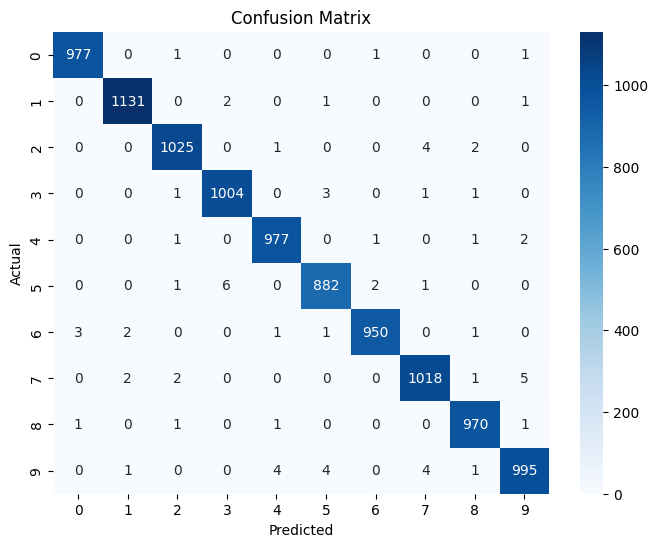

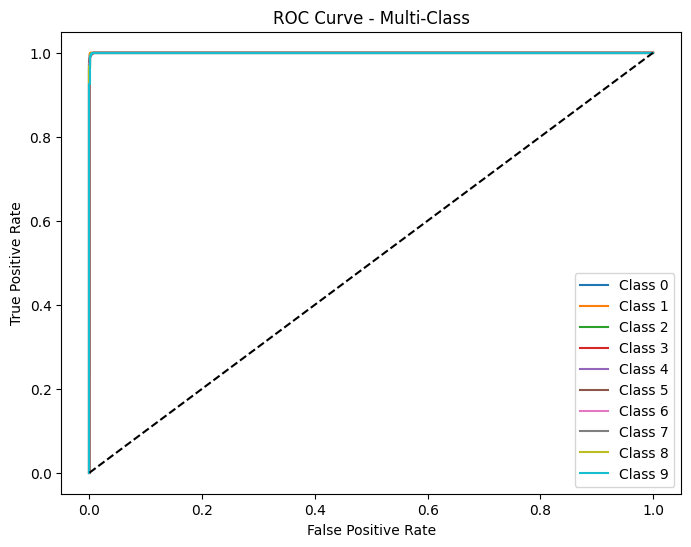

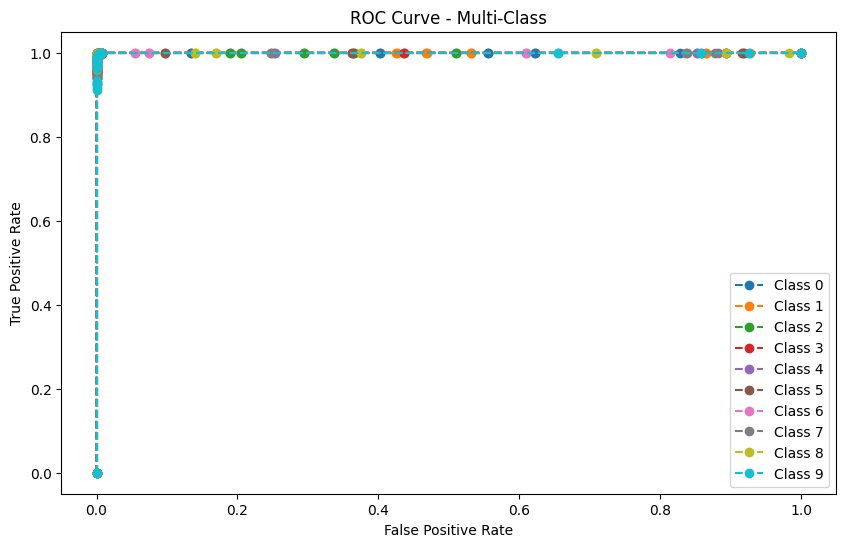

In [ ]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=64)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC Score: {auc:.4f}")

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr = {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])

plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], linestyle='--', marker='o', label=f"Class {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-Class")
plt.legend()
plt.show()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.3711 - loss: 1.7193 - val_accuracy: 0.5687 - val_loss: 1.2448
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
              precision    recall  f1-score   support

           0       0.56      0.71      0.63      1000
           1       0.56      0.83      0.67      1000
           2       0.43      0.45      0.44      1000
           3       0.45      0.39      0.42      1000
           4       0.61      0.35      0.45      1000
           5       0.55      0.41      0.47      1000
           6       0.65      0.68      0.66      1000
           7       0.64      0.64      0.64      1000
           8       0.66      0.63      0.65      1000
           9       0.58      0.59      0.59      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.56     10000
weighted avg       0.57      0.57      0.56     10000

AUC Score: 0.9123


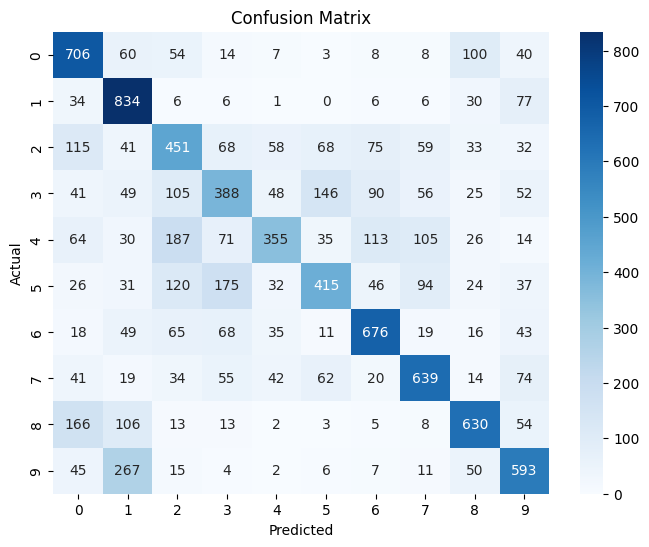

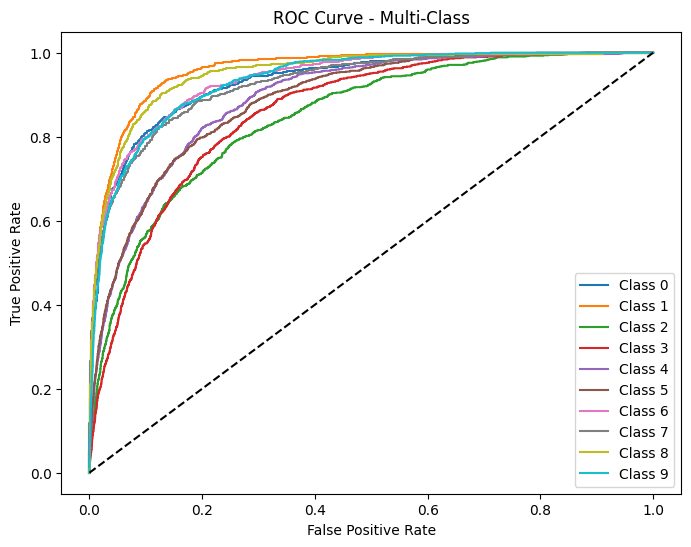

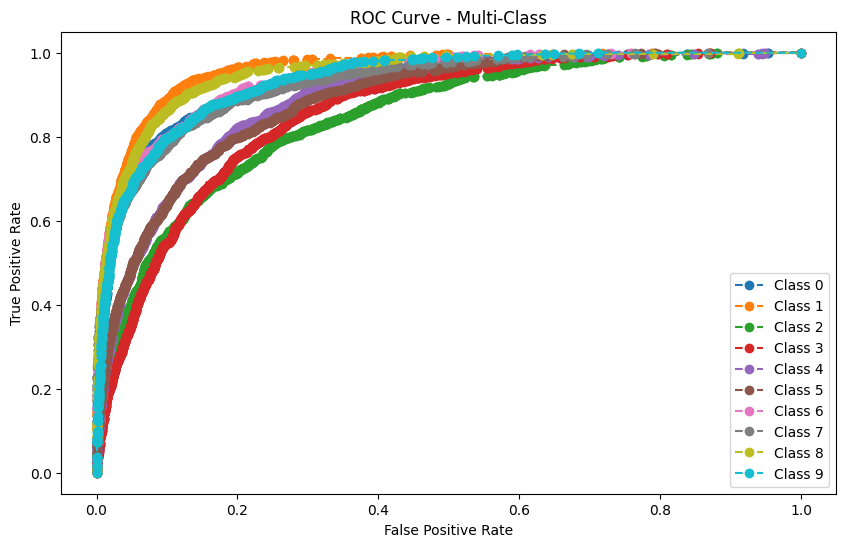

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0



y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC Score: {auc:.4f}")

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr = {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])

plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], linestyle='--', marker='o', label=f"Class {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-Class")
plt.legend()
plt.show()

